In [1]:
# Import statements
import pandas as pd
import numpy as np

In [2]:
# Import 'matplotlib.pyplot'
import matplotlib.pyplot as plt

def distribution(data, value, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate([value]):
        ax = fig.add_subplot(1, 1, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim((0, 500))
        ax.set_yticks([0, 100, 200, 300, 400, 500])

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions of Continuous EEG Data Features", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()

In [3]:
# Import 'accuracy_score'
from sklearn.metrics import accuracy_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = accuracy_score(y_true, y_predict)
    
    # Return the score
    return score

In [4]:
# Import 'make_scorer', 'LDA', 'GridSearchCV', and 'ShuffleSplit'
from sklearn.metrics import make_scorer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a linear discriminant analysis object
    clf = LDA()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'solver':['svd', 'lsqr', 'eigen'], 'tol':[0.0001, 0.001, 0.01]}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'clf', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(clf, params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [5]:
# Allows the use of display() for DataFrames
from IPython.display import display

# Read the data.
raw_data = pd.read_csv('eeg_bands.csv')

# Split the data into features and target label
target_raw = raw_data['state']
features_raw = raw_data.drop('state', axis = 1)

# Print data shape. 
print("The shape of the data: {}".format(raw_data.shape))

# Success - Display the first nine records
display(raw_data.head(n=9))

The shape of the data: (306, 6)


,delta,theta,alpha,beta,gamma,state
0,1237.935339,26.654825,4.319927,5.587181,2.346162,1
1,2706.809361,16.752475,5.756114,6.089437,2.769464,1
2,12299.778782,216.296640,21.946405,10.488320,3.565331,1
3,6337.902264,12.716597,4.337743,5.991419,3.326028,2
4,2210.281559,26.396301,4.365897,6.468047,3.225884,2
5,6132.013923,25.131828,5.525610,6.923929,4.370456,2
6,2144.435248,10.448865,3.447408,4.930768,2.002210,3
7,1719.482344,11.885981,3.475816,5.203833,2.102311,3
8,41.705278,7.948842,3.042720,4.347130,1.852414,3


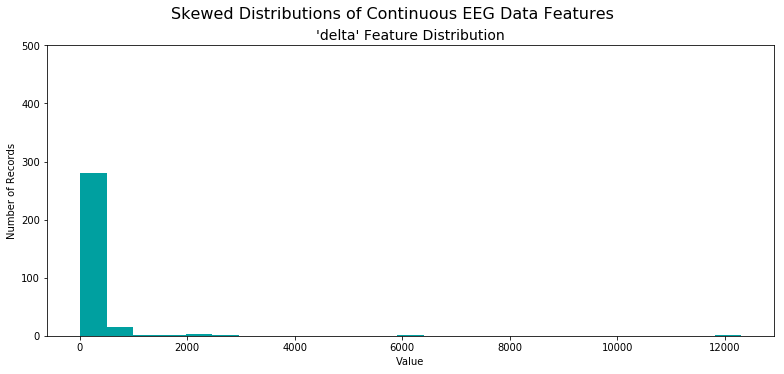

In [6]:
# Visualize skewed continuous features of original data
distribution(raw_data, 'delta')

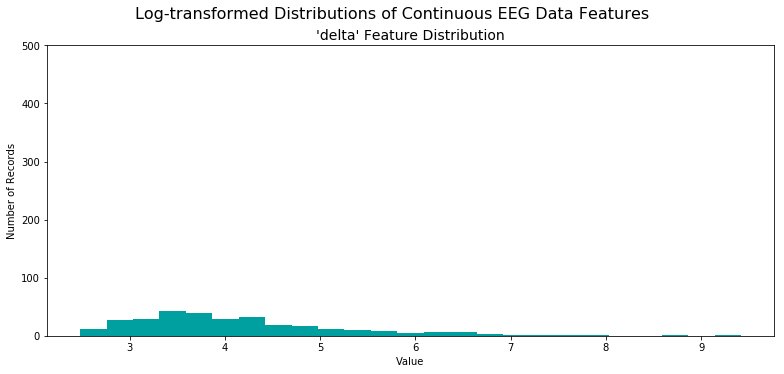

In [7]:
# Log-transform the skewed features
features_log_transformed = features_raw.apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, 'delta', transformed = True)

In [8]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

features_log_minmax_transform = scaler.fit_transform(features_log_transformed)

In [9]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Assign the features to the variable Bands, and the labels to the variable state. 
Bands = np.array(features_log_minmax_transform)
state = np.array(target_raw)

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(Bands, state, test_size=0.2, random_state=42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [10]:
# Fit the training data to the model using grid search
model = fit_model(X_train, y_train)

# Produce the value for 'solver' and 'tol'
print("Parameter 'solver' is {} for the optimal model.".format(model.get_params()['solver']))
print("Parameter 'tol' is {} for the optimal model.\n".format(model.get_params()['tol']))

# Make predictions. Store them in the variable y_pred.
y_pred = model.predict(X_test)

# Label states class.
states_class = ['Focused', 'De-Focused', 'Drowsy']

# Show predictions
for i, state in enumerate(y_pred):
    print("Predicted mental state for test {}'s bands: {}".format(i+1, states_class[state-1]))

Parameter 'solver' is svd for the optimal model.
Parameter 'tol' is 0.0001 for the optimal model.

Predicted mental state for test 1's bands: Focused
Predicted mental state for test 2's bands: Focused
Predicted mental state for test 3's bands: De-Focused
Predicted mental state for test 4's bands: Drowsy
Predicted mental state for test 5's bands: Drowsy
Predicted mental state for test 6's bands: Focused
Predicted mental state for test 7's bands: Focused
Predicted mental state for test 8's bands: De-Focused
Predicted mental state for test 9's bands: Focused
Predicted mental state for test 10's bands: Focused
Predicted mental state for test 11's bands: Focused
Predicted mental state for test 12's bands: Focused
Predicted mental state for test 13's bands: Focused
Predicted mental state for test 14's bands: Drowsy
Predicted mental state for test 15's bands: Focused
Predicted mental state for test 16's bands: Focused
Predicted mental state for test 17's bands: De-Focused
Predicted mental sta

In [11]:
# Import 'f1_score'
from sklearn.metrics import f1_score

# Calculate the f1 score and assign it to the variable score.
score = f1_score(y_test, y_pred, average='micro')

# Print score
print("F1 score:", score) 

F1 score: 0.5483870967741935
